## Conceptual 

### 1. 

A model is said to be "high dimensional" when n isn't very large with respect to p. In other words, when the model does not have a sufficiently large data-set with respect to the number of variables. This is the curse of dimensionality. In terms of model fit, this problem impacts prediction accuracy. If the model is high dimensional, then methods like least squares fit will have high variance, resulting in overfitting and thereby impairing the test accuracy for predicting new data. Thus, you can never find the best fit for the function $\text{f()}$. In terms of model interpretation, having a lot of variables increases the complexity between the interrelationships of the predictor variables and this makes it difficult to interpret exact $\text{X} \rightarrow \text{Y}$. 

### 2.  

- Subset selection is when you select the subset of predictors that do the best to meet a biased adjusted criterion by trying all possible model combinations. In other words, you test all the possible combinations of the model, calculate a bias adjusted model fit measure and select the model with the best adjusted fit. This deals with the curse of dimensionality by choosing exactly which predictor variables to include in the model. This method is a post hoc method and is computationally expensive.
- Shrinkage models involve feature selection which is idetifying which parameters to keep and to include. They are a class of linear models that penalize for dimensionality in the fitting process itself, and select for the most robust predictor variables for the model. 
    - Ridge regression had an additional free parameter in the model called the tuning paramater ($\lambda$) that controls the degree of the shrinkage penaltry on the regression coefficients during estimates. This shrinkage penalty reflects the fact that the squared value of the regression coefficients is being penalized. The higher the value of $\lambda$, the more sparse the model. Ridge regression managers the bias-variance trafeoff to control for overfitting and it works better in situations with high variance. 
    - Unlike ridge regression that does not undergo feature selection to remove any predictors from the model, Lease Absolute Shrinkage and Selection Operator (LASSO) involves both shrinkage penalty and feature selectoin. LASSO shrinks the estimates of the regression coefficient to zero, based on $\lambda$ and when the solution converges to zero, a parameter is removed from the model. Thus, LASSO picks the best variabile out of the set of correlated variables to be the representative variable. It is also more convservative than ridge and best subset selection. 
    
### 3.

### (a) 

The correct answer is (iii) i.e., LASSO is less flexible and hence will give more improved prediction accuracy when its increase in variance is less than increase in bias. This is because LASSO is a more restrictive model and will give improved precision accuracy as long the bias is not too high. 

### (b) 

The correct answer is (iii) i.e., as even ridge regression is also less flexible. 

### (c) 

The correct answer is (ii) because principal component regression is more flexible compared to least squares and predicts better results since most of the variation is condensed into principal components and estimating less coefficients reduces the chances of overfitting. 




## Applied 

### 6.8

(Intercept)           X      I(X^3)      I(X^4)      I(X^6)      I(X^8) 
 0.71574441  2.73840766  1.08625769  2.51679633 -1.11023099  0.19274820 
    I(X^10) 
-0.01094609

[1] 3

[1] 3

[1] 6

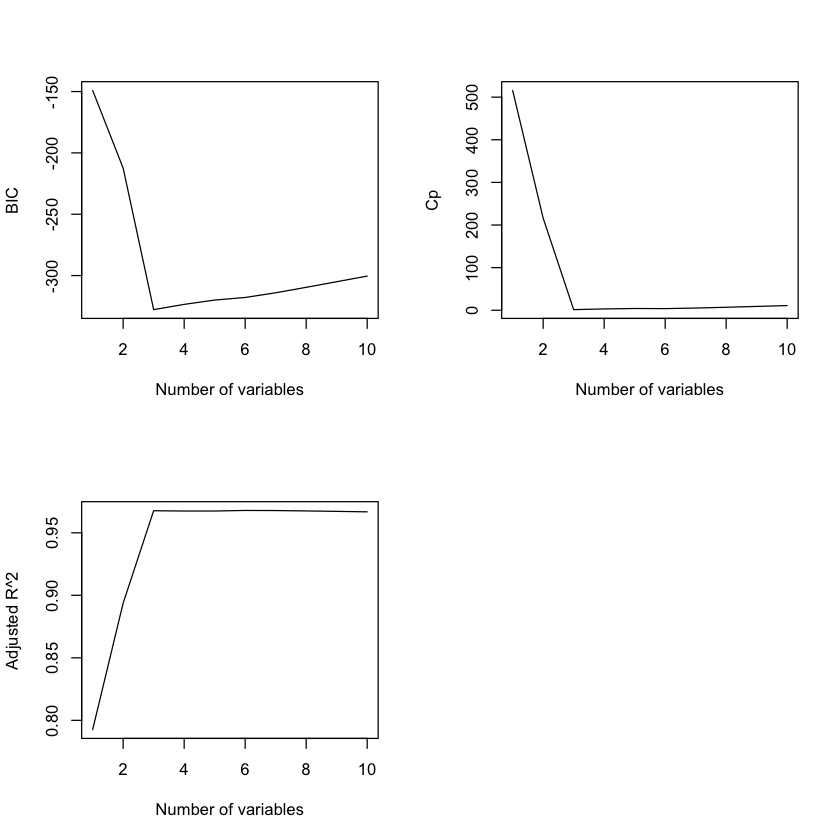

In [41]:
library(leaps) 
# (a) 

X = rnorm(n = 100)
epsilon = rnorm(n = 100)

# (b)

b0 = 0.5
b1 = 3
b2 = 2
b3 = 1
Y = b0 + (b1 * X) + (b2 * X^2) + (b3 * X^3) + epsilon

# (c)

df = data.frame(X,Y)
reg.fit = regsubsets(Y ~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + I(X^6) + I(X^7) + I(X^8) + I(X^9) + I(X^10), 
                    data = df, nvmax = 10)
reg.summary = summary(reg.fit)

par(mfrow = c(2,2))
plot(reg.summary$bic, xlab="Number of variables", ylab="BIC", type="l") # BIC
plot(reg.summary$cp, xlab="Number of variables", ylab="Cp", type = "l") # CP
plot(reg.summary$adjr2, xlab="Number of variables", ylab="Adjusted R^2", type = "l") # Adjusted R-squared 

coef(reg.fit, which.max(reg.summary$adjr2))

which.min(reg.summary$cp)
which.min(reg.summary$bic)
which.max(reg.summary$adjr2)

We notice that for according to $C_p$ we pick the 3 variable model, according to BIC we pick the 3 variable model and according to Adjusted R-squared we pick the 6 variable model. 

(Intercept)           X      I(X^2)      I(X^3) 
  0.4617875   2.8399379   1.9947137   1.0312459

[1] 3

[1] 3

[1] 3

(Intercept)           X      I(X^4)      I(X^5)      I(X^6)      I(X^7) 
 0.73096616  3.28171080  2.52227831  0.51321674 -1.12936879 -0.06641671 
     I(X^8)     I(X^10) 
 0.20510159 -0.01294005

[1] 7

[1] 5

[1] 7

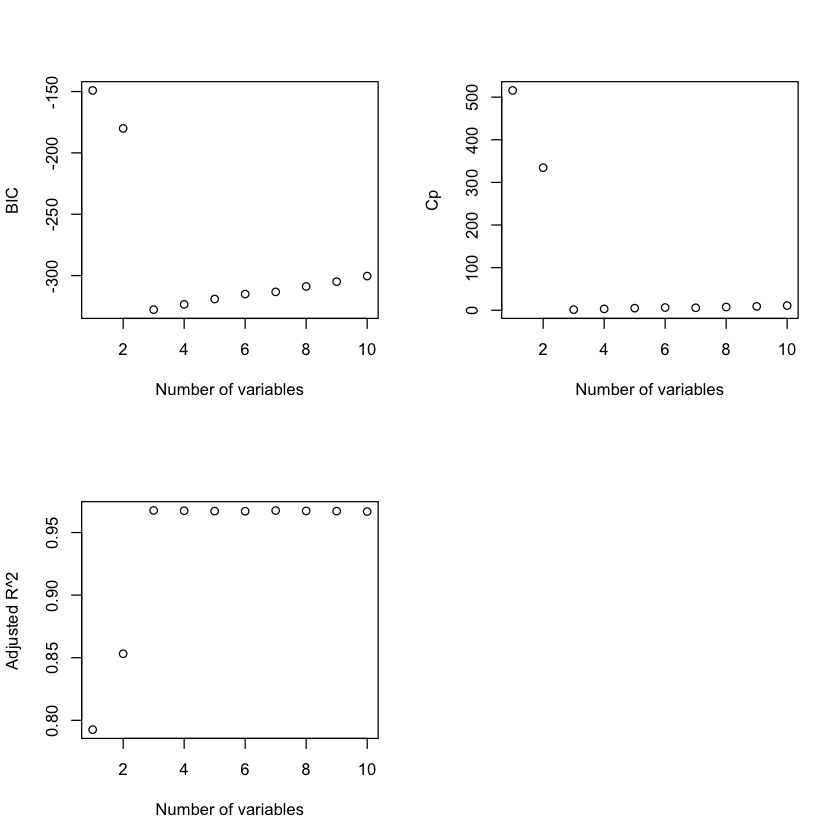

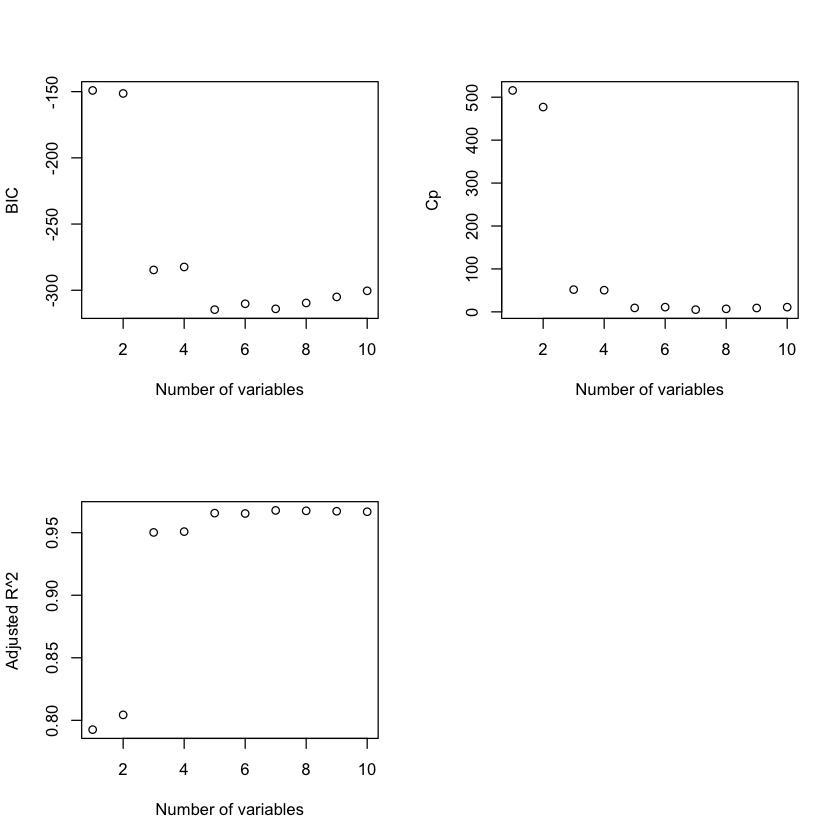

In [43]:
# (d)

# Forward Step-wise Selection 
regfit.fwd = regsubsets(Y ~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + I(X^6) + I(X^7) + I(X^8) + I(X^9) + I(X^10), 
                    data = df, nvmax = 10, method = "forward")
reg.summary.fwd = summary(regfit.fwd)

par(mfrow = c(2,2))
plot(reg.summary.fwd$bic, xlab="Number of variables", ylab="BIC") # BIC
plot(reg.summary.fwd$cp, xlab="Number of variables", ylab="Cp") # CP
plot(reg.summary.fwd$adjr2, xlab="Number of variables", ylab="Adjusted R^2") # Adjusted R-squared 
coef(regfit.fwd, which.max(reg.summary.fwd$adjr2))

which.min(reg.summary.fwd$cp)
which.min(reg.summary.fwd$bic)
which.max(reg.summary.fwd$adjr2)


# Backward Step-wise Selection 
regfit.back = regsubsets(Y ~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + I(X^6) + I(X^7) + I(X^8) + I(X^9) + I(X^10), 
                    data = df, nvmax = 10, method = "backward")
reg.summary.back = summary(regfit.back)

par(mfrow = c(2,2))
plot(reg.summary.back$bic, xlab="Number of variables", ylab="BIC") # BIC
plot(reg.summary.back$cp, xlab="Number of variables", ylab="Cp") # CP
plot(reg.summary.back$adjr2, xlab="Number of variables", ylab="Adjusted R^2") # Adjusted R-squared 
coef(regfit.back, which.max(reg.summary.back$adjr2))


which.min(reg.summary.back$cp)
which.min(reg.summary.back$bic)
which.max(reg.summary.back$adjr2)


In the forward step-wise selection, according to $C_p$ we pick the 3 variable model, according to BIC we pick the 3 variable model and according to Adjusted R-squared we pick the 3 variable model. 
In the back-ward step-wise selection, according to $C_p$ we pick the 7 variable model, according to BIC we pick the 5 variable model and according to Adjusted R-squared we pick the 7 variable model. 

[1] 0.048

(Intercept)           X      I(X^2)      I(X^3)      I(X^4)      I(X^5) 
 0.51954946  0.96910141  2.79594681  1.98185727  0.06781758  0.00000000 
     I(X^6)      I(X^7)      I(X^8)      I(X^9)     I(X^10) 
 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000

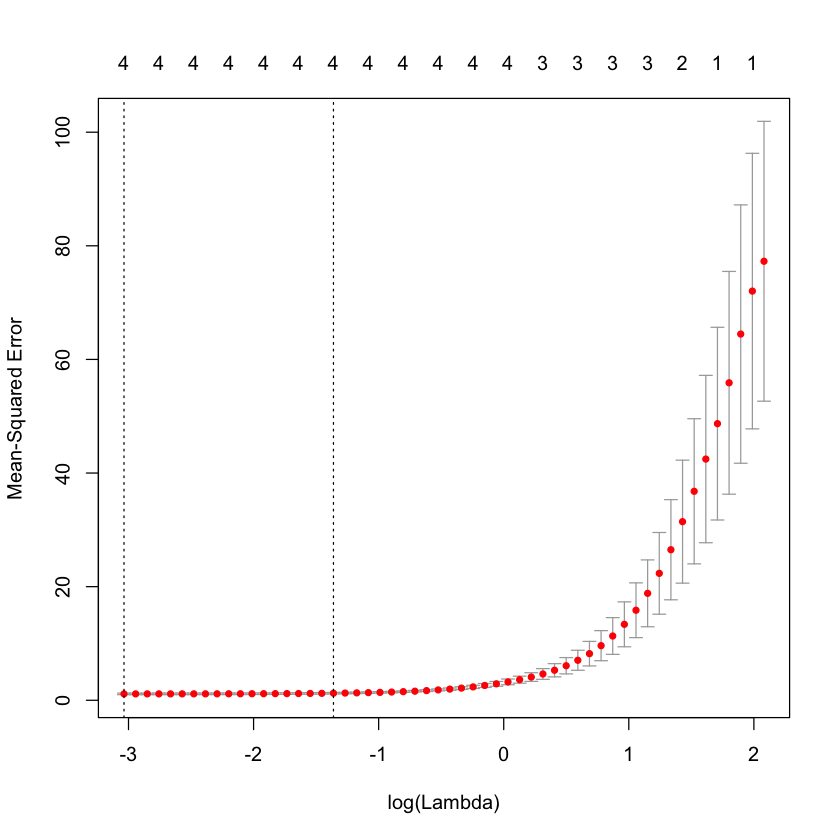

In [18]:
# (e)

library(glmnet)
mat = model.matrix(Y ~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + I(X^6) + I(X^7) + I(X^8) + I(X^9) + I(X^10), 
                    data = df)[, -1]
cv.out = cv.glmnet(mat, Y, alpha = 1)
plot(cv.out)

lambda = cv.out$lambda.min
round(lambda,3)

lasso.fit = glmnet(mat, Y, alpha = 1)
predict(lasso.fit, s = lambda, type = "coefficients")[1:11, ]

The lasso model selects ${X}$, ${X}^2$, ${X}^3$ and ${X}^4$ and we obtained a value for $\lambda$ = `0.048`

[1] 1

[1] 1

[1] 1

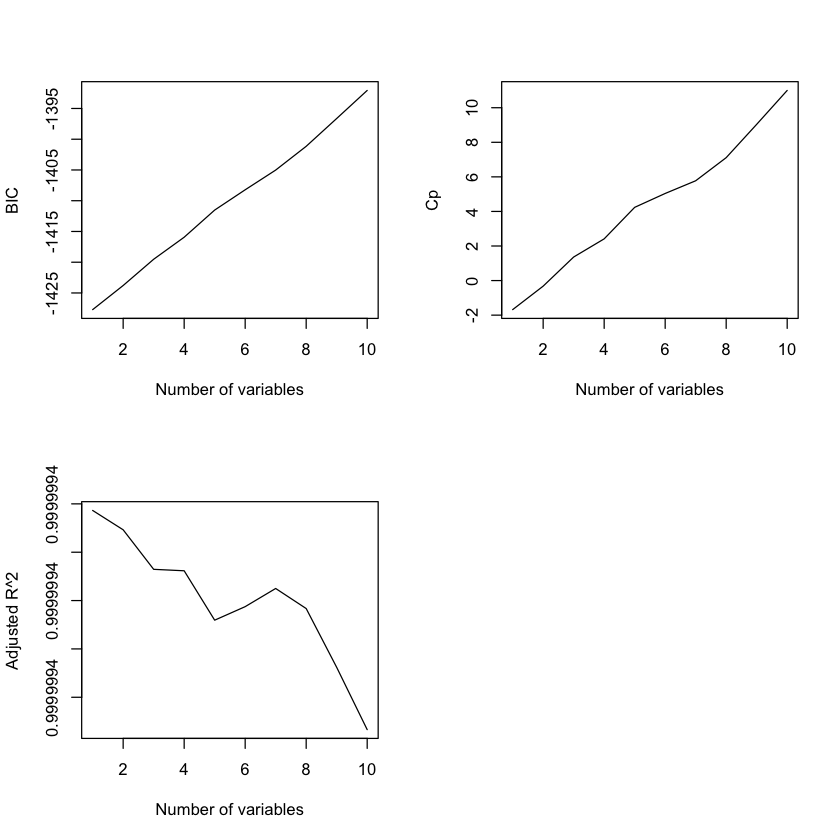

In [46]:
# (f) 
b7 = 7 
Y = b0 + (b7 * X^7) + epsilon
df1 = data.frame(X,Y)
reg.fit1 = regsubsets(Y ~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + I(X^6) + I(X^7) + I(X^8) + I(X^9) + I(X^10), 
                    data = df1, nvmax = 10)
reg.summary1 = summary(reg.fit1)

par(mfrow = c(2,2))
plot(reg.summary1$bic, xlab="Number of variables", ylab="BIC", type="l") # BIC
plot(reg.summary1$cp, xlab="Number of variables", ylab="Cp", type = "l") # CP
plot(reg.summary1$adjr2, xlab="Number of variables", ylab="Adjusted R^2", type = "l") # Adjusted R-squared 

which.min(reg.summary1$cp)
which.min(reg.summary1$bic)
which.max(reg.summary1$adjr2)

We notice that for according to $C_p$ we pick the 1 variable model, according to BIC we pick the 1 variable model and according to Adjusted R-squared we pick the 1 variable model.

[1] 43.96

(Intercept)           X      I(X^2)      I(X^3)      I(X^4)      I(X^5) 
  -4.209402    0.000000    0.000000    0.000000    0.000000    0.000000 
     I(X^6)      I(X^7)      I(X^8)      I(X^9)     I(X^10) 
   0.000000    6.776147    0.000000    0.000000    0.000000

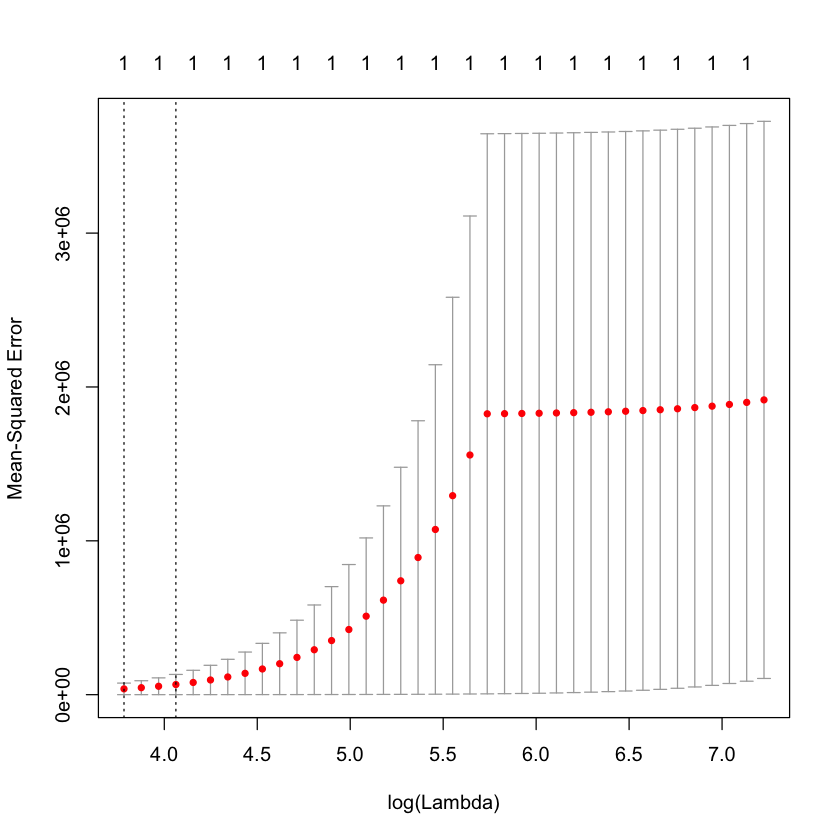

In [48]:
Y = b0 + (b7 * X^7) + epsilon
mat1 = model.matrix(Y ~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + I(X^6) + I(X^7) + I(X^8) + I(X^9) + I(X^10), 
                    data = df1)[, -1]
cv.out1 = cv.glmnet(mat1, Y, alpha = 1)
plot(cv.out1)

lambda1 = cv.out1$lambda.min
round(lambda1,3)

lasso.fit.1 = glmnet(mat1, Y, alpha = 1)
predict(lasso.fit.1, s = lambda1, type = "coefficients")[1:11, ]

### 6.9 

In [61]:
# (a)

library(ISLR)
data(College)
#attach(College)

set.seed(10)
train = sample(1:nrow(College), nrow(College)/2)
train = sample(1:nrow(College), nrow(College)/2)
College.train = College[train,]
test = -train
College.test = College[test, ]

In [62]:
# (b)

lm.fit = lm(Apps ~., data = College.train)
lm.pred = predict(lm.fit, College.test)
mean((lm.pred - College.test$Apps)^2)

[1] 1273972

The test error obtained it 1273971.65

In [71]:
# (c)
train = model.matrix(Apps ~., data = College.train)
test = model.matrix(Apps ~., data = College.test)

grid = 10^seq(10, -2, length=100)
ridge.mod = glmnet(train, College.train$Apps, alpha=0, lambda=grid, thresh=1e-12)
ridge.cv = cv.glmnet(train, College.train$Apps, alpha=0, lambda=grid, thresh=1e-12)
lambda = ridge.cv$lambda.min
lambda

ridge.pred = predict(ridge.mod, s = lambda, newx = test)
mean((ridge.pred - College.test$Apps)^2)

[1] 24.77076

[1] 1347519

The test error is 1347518.83. 

In [72]:
# (d)
lasso.mod = glmnet(train, College.train$Apps, alpha=1, lambda=grid, thresh=1e-12)
lasso.cv = cv.glmnet(train, College.train$Apps, alpha=1, lambda=grid, thresh=1e-12)
lambda.lasso = lasso.cv$lambda.min
lambda.lasso 

lasso.pred = predict(lasso.mod, s = lambda.lasso, newx = test)
mean((lasso.pred - College.test$Apps)^2)

[1] 18.73817

[1] 1382092

The test error is 1382092.39,


Attaching package: ‘pls’

The following object is masked from ‘package:stats’:

    loadings



[1] 2891234

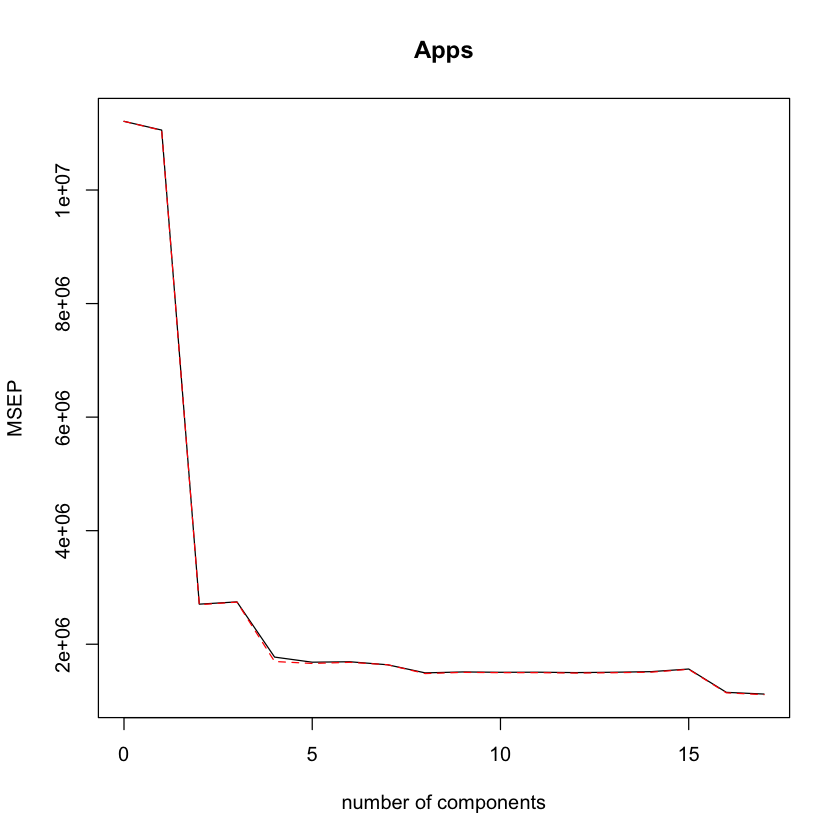

In [64]:
# (e)

library(pls)
set.seed(2)
pcr.fit = pcr(Apps~., data=College.train, scale=TRUE, validation="CV")
validationplot(pcr.fit, val.type="MSEP")

pcr.pred = predict(pcr.fit, College.test, ncomp = 10)
mean((pcr.pred - College.test$Apps)^2)

The test error is 2891233.85 for the PCR model. 

[1] 1286518

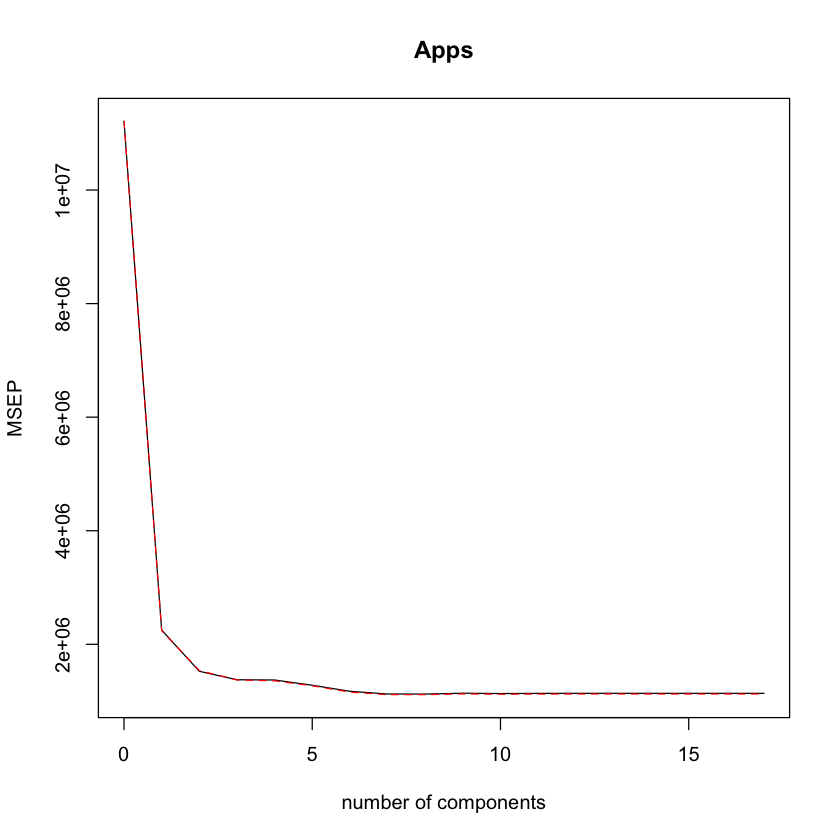

In [65]:
# (f)

pls.fit = plsr(Apps~., data=College.train, scale=TRUE, validation="CV")
validationplot(pls.fit, val.type="MSEP")

pls.pred = predict(pls.fit, College.test, ncomp = 10)
mean((pls.pred - College.test$Apps)^2)

The test error for the PLS model is 1286517.97.

(g) Based on the test errors we notice the PCR has the highest MSE and this indicates that it does not predict College Apps with accuracy. Additionally, we could compute the R-squared values. 